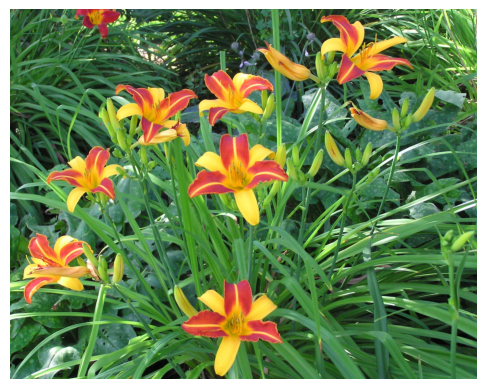

In [1]:
#Q1. Staore image in array and display 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image_path = r"daylilies.jpg"
ImJPG = Image.open(image_path)
ImJPG = np.array(ImJPG)
# Display the image
plt.imshow(ImJPG)
plt.axis('off')
plt.show()

In [2]:
#Q2. Dimensions of image
m, n, l = ImJPG.shape
print(f"Dimensions of the image: {m}x{n}x{l}")

Dimensions of the image: 1593x2009x3


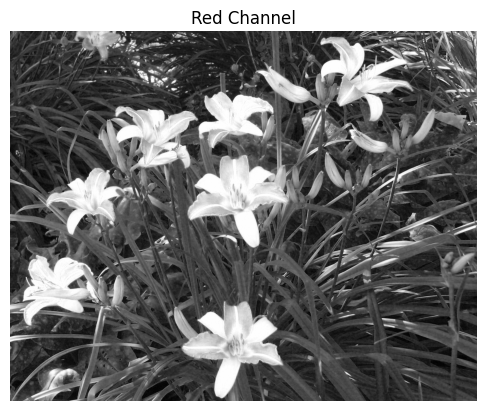

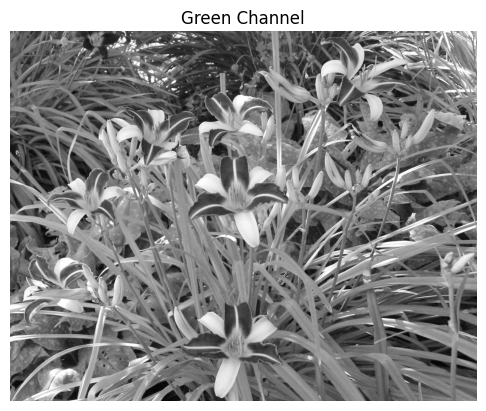

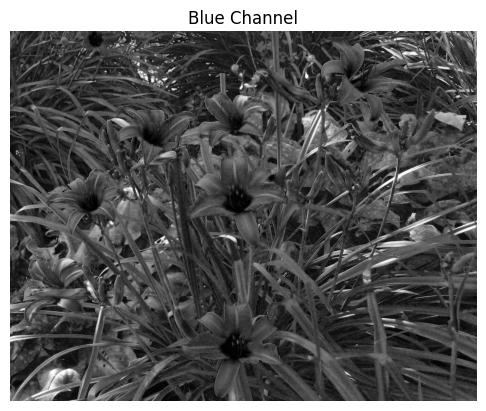

In [3]:
#Q3. Extract individual layers or color channels from the image array.
# Extract color channels
redChannel = ImJPG[:, :, 0]
greenChannel = ImJPG[:, :, 1]
blueChannel = ImJPG[:, :, 2]
# Display the color channels
plt.figure()
plt.imshow(redChannel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(greenChannel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')
plt.show()
plt.figure()
plt.imshow(blueChannel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')
plt.show()

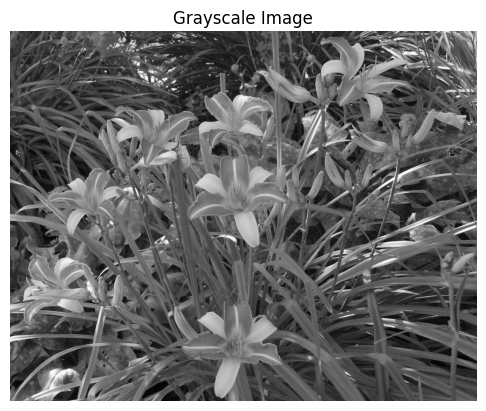

In [4]:
#Q4. Convert the image into a grayscale image by using the given filter matrix
# Define the GrayMatrix filter
GrayMatrix = np.array([[1/3, 1/3, 1/3],
 [1/3, 1/3, 1/3],
 [1/3, 1/3, 1/3]])
# Initialize ImJPG_Gray with the same shape as ImJPG
ImJPG_Gray = np.zeros_like(ImJPG, dtype=np.uint8)
# Convert each pixel to grayscale
for i in range(m):
    for j in range(n):
        PixelColor = ImJPG[i, j, :].reshape(3, 1) # Reshape to (3, 1) for matrix multiplication
        ImJPG_Gray[i, j, :] = np.dot(GrayMatrix, PixelColor).flatten().astype(np.uint8)
# Display the grayscale image
plt.figure()
plt.imshow(ImJPG_Gray)
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

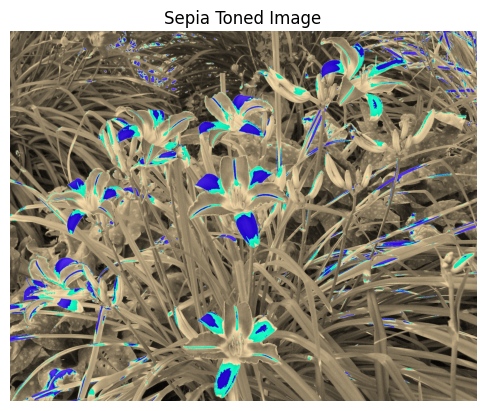

In [5]:
#Q5. Modify the code above to produce a sepia conversion of the image

SepiaMatrix = np.array([[0.393, 0.769, 0.189],
 [0.349, 0.686, 0.168],
 [0.272, 0.534, 0.131]])
# Initialize ImJPG_Sepia with the same shape as ImJPG
ImJPG_Sepia = np.zeros_like(ImJPG, dtype=np.uint8)
for i in range(m):
 for j in range(n):
     PixelColor = ImJPG[i, j, :].reshape(3, 1) # Reshape to (3, 1) for matrix multiplication
     ImJPG_Sepia[i, j, :] = np.dot(SepiaMatrix, PixelColor).flatten().astype(np.uint8)
plt.figure()
plt.imshow(ImJPG_Sepia)
plt.title('Sepia Toned Image')
plt.axis('off')
plt.show()

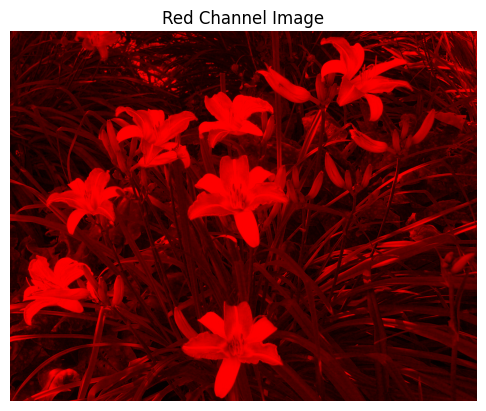

In [6]:
#Q6. Modify the code again, using the matrix given as a filter matrix
RedMatrix = np.array([[1, 0, 0],
 [0, 0, 0],
 [0, 0, 0]])
# Initialize ImJPG_Red with the same shape as ImJPG
ImJPG_Red = np.zeros_like(ImJPG, dtype=np.uint8)
# Convert each pixel to red channel only
for i in range(m):
 for j in range(n):
     PixelColor = ImJPG[i, j, :].reshape(3, 1) # Reshape to (3, 1) for matrix multiplication
     ImJPG_Red[i, j, :] = np.dot(RedMatrix, PixelColor).flatten().astype(np.uint8)
# Display the red channel image
plt.figure()
plt.imshow(ImJPG_Red)
plt.title('Red Channel Image')
plt.axis('off')
plt.show()

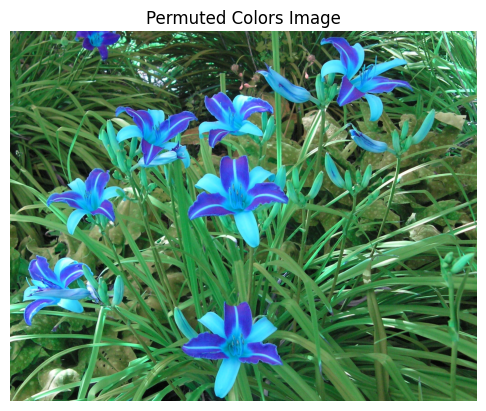

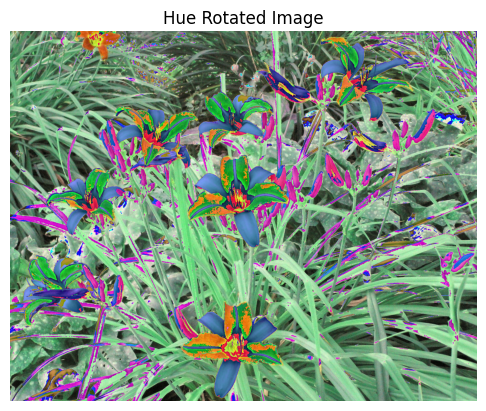

In [7]:
#Q7. Permute Colors in image
PermuteMatrix = np.array([
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0]
])
ImJPG_Permute = np.dot(ImJPG.astype(float), PermuteMatrix).astype(np.uint8)

for i in range(m):
 for j in range(n):
     PixelColor = ImJPG[i, j, :].reshape(3, 1) # Reshape to (3, 1) for matrix multiplication
     ImJPG_Permute[i, j, :] = np.dot(PermuteMatrix, PixelColor).flatten().astype(np.uint8)

plt.figure()
plt.imshow(ImJPG_Permute)
plt.title('Permuted Colors Image')
plt.axis('off')
plt.show()

#7 using hue rotate matrix and variable theta
# Define rotation angle θ (in radians)
theta = np.radians(45) # Example angle, adjust as desired
# Define the HueRotateMatrix
HueRotateMatrix = np.array([[0.213 + np.cos(theta), 0.715 - 0.715*np.cos(theta) -
0.072*np.sin(theta), 0.072 + 0.928*np.sin(theta)],
 [0.213 - 0.213*np.cos(theta) + 0.285*np.sin(theta), 0.715 + np.cos(theta), 
0.072 - 0.283*np.sin(theta)],
 [0.213 - 0.787*np.sin(theta), 0.715 - 0.715*np.cos(theta) + 
0.928*np.sin(theta), 0.072 + np.cos(theta)]])
# Initialize ImJPG_HueRotate with the same shape as ImJPG
ImJPG_HueRotate = np.zeros_like(ImJPG, dtype=np.uint8)
# Apply the HueRotateMatrix to rotate the hue of the image
for i in range(m):
 for j in range(n):
     PixelColor = ImJPG[i, j, :].reshape(3, 1) # Reshape to (3, 1) for matrix multiplication
     ImJPG_HueRotate[i, j, :] = np.dot(HueRotateMatrix, 
PixelColor).flatten().astype(np.uint8)
# Display the hue rotated image
plt.figure()
plt.imshow(ImJPG_HueRotate)
plt.title('Hue Rotated Image')
plt.axis('off')
plt.show()


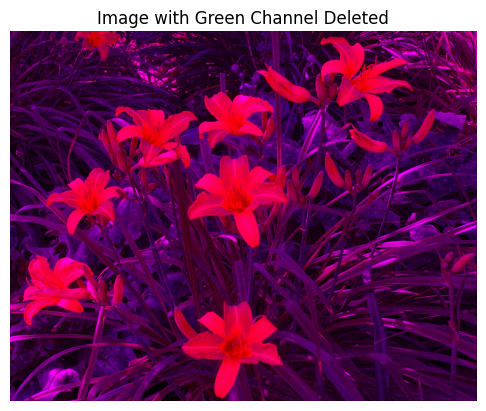

In [8]:
#Q8. Delete one of the colors in the image, say, green
DeleteGreenMatrix = np.array([[1, 0, 0],
 [0, 0, 0],
 [0, 0, 1]])
# Initialize ImJPG_DeleteGreen with the same shape as ImJPG
ImJPG_DeleteGreen = np.zeros_like(ImJPG, dtype=np.uint8)
# Apply the DeleteGreenMatrix to remove the green channel
for i in range(m):
 for j in range(n):
     PixelColor = ImJPG[i, j, :].reshape(3, 1) # Reshape to (3, 1) for matrix multiplication
     ImJPG_DeleteGreen[i, j, :] = np.dot(DeleteGreenMatrix, 
PixelColor).flatten().astype(np.uint8)
# Display the image with green channel deleted
plt.figure()
plt.imshow(ImJPG_DeleteGreen)
plt.title('Image with Green Channel Deleted')
plt.axis('off')
plt.show()

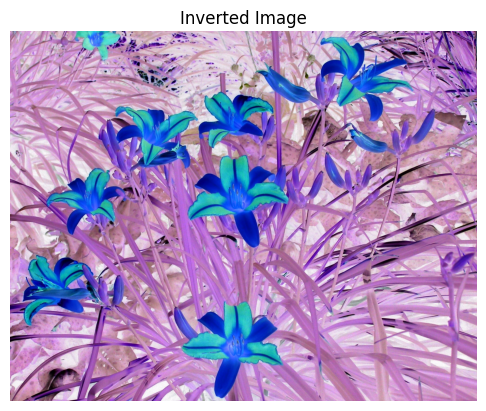

In [9]:
#Q9. Invert the colors of the image

ImJPG_Invert = 255 - ImJPG
# Display the inverted image
plt.figure()
plt.imshow(ImJPG_Invert)
plt.title('Inverted Image')
plt.axis('off')
plt.show()

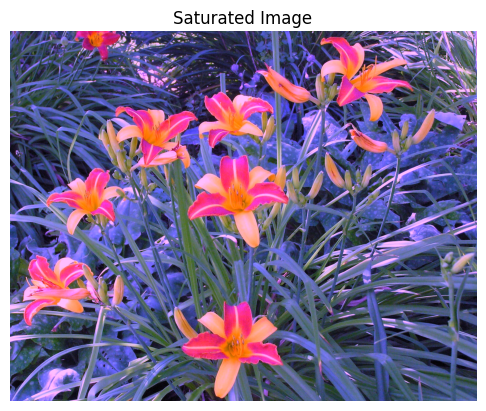

In [10]:
#Q10. Enhance/mute individual colors in the image
# Define the SaturateMatrix
SaturateMatrix = np.array([[1.2, 0, 0],
 [0, 0.75, 0],
 [0, 0, 2]])
# Apply the color transformation
ImJPG_Saturate = np.dot(ImJPG.astype(float), SaturateMatrix)
# Ensure values are within valid range (0-255) and convert to uint8
ImJPG_Saturate = np.clip(ImJPG_Saturate, 0, 255).astype(np.uint8)
# Display or save the resulting image
plt.figure()
plt.imshow(ImJPG_Saturate)
plt.title('Saturated Image')
plt.axis('off')
plt.show()

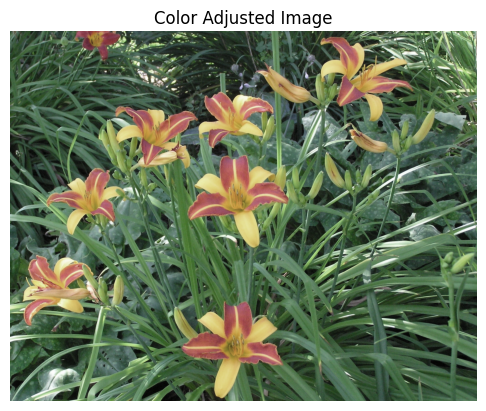

In [11]:
#Q11. Consider the color adjusting filter generated by the given matrix. Apply this filter to the array ImJPG and save the result as ImJPG User.
UserMatrix = np.array([[0.7, 0.15, 0.15],
 [0.15, 0.7, 0.15],
 [0.15, 0.15, 0.7]])
# Apply the color adjustment transformation
ImJPG_User = np.dot(ImJPG.astype(float), UserMatrix)
# Ensure values are within valid range (0-255) and convert to uint8
ImJPG_User = np.clip(ImJPG_User, 0, 255).astype(np.uint8)
# Display or save the resulting image
plt.figure()
plt.imshow(ImJPG_User)
plt.title('Color Adjusted Image')
plt.axis('off')
plt.show()

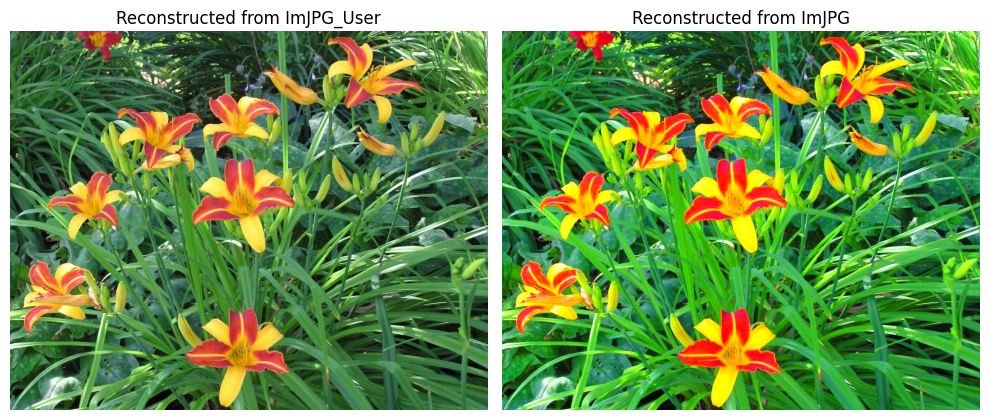

In [12]:
#Q12. Can you get the original image colors back once you applied the filter? Or is some of the information lost? Use the inv command to create the matrix for the inverse filter

UserMatrix = np.array([[0.7, 0.15, 0.15],
 [0.15, 0.7, 0.15],
 [0.15, 0.15, 0.7]])
# Calculate the inverse of UserMatrix
UserMatrix_inv = np.linalg.inv(UserMatrix)
# Apply the inverse transformation to ImJPG_User and ImJPG
ImJPG_User_original = np.dot(ImJPG_User.astype(float), UserMatrix_inv).clip(0, 
255).astype(np.uint8)
ImJPG_original = np.dot(ImJPG.astype(float), UserMatrix_inv).clip(0, 255).astype(np.uint8)
# Display or save the resulting images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ImJPG_User_original)
plt.title('Reconstructed from ImJPG_User')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(ImJPG_original)
plt.title('Reconstructed from ImJPG')
plt.axis('off')
plt.tight_layout()
plt.show()

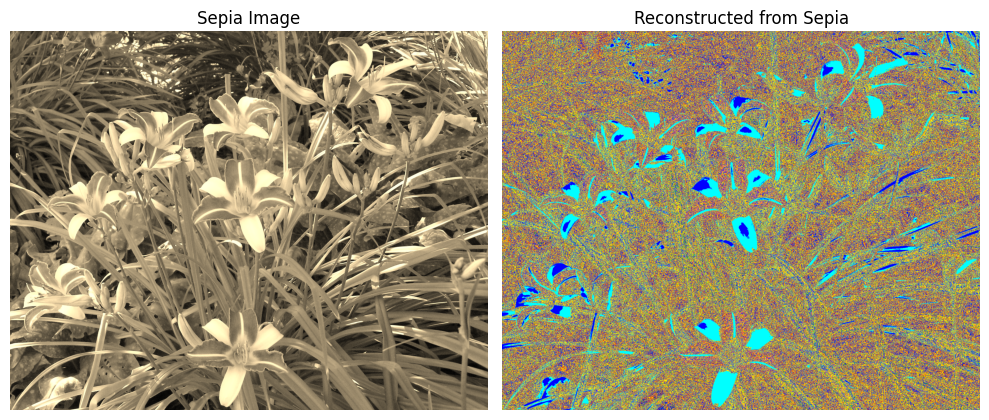

In [13]:
#Q13. Repeat the steps above to see if the sepia transformation is invertible

SepiaMatrix = np.array([[0.393, 0.769, 0.189],
                         [0.349, 0.686, 0.168],
                         [0.272, 0.534, 0.131]])

# Convert to sepia
ImJPG_Sepia = np.dot(ImJPG.astype(float), SepiaMatrix.T)
ImJPG_Sepia = np.clip(ImJPG_Sepia, 0, 255).astype(np.uint8)

# Attempt to compute the inverse of SepiaMatrix
try:
    SepiaMatrix_inv = np.linalg.inv(SepiaMatrix)  # Compute inverse matrix

    # Apply inverse transformation
    ImJPG_Sepia_original = np.dot(ImJPG_Sepia.astype(float), SepiaMatrix_inv.T)
    ImJPG_Sepia_original = np.clip(ImJPG_Sepia_original, 0, 255).astype(np.uint8)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(ImJPG_Sepia)
    plt.title('Sepia Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(ImJPG_Sepia_original)
    plt.title('Reconstructed from Sepia')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

except np.linalg.LinAlgError:
    print("Sepia transformation is not invertible due to singularity.")


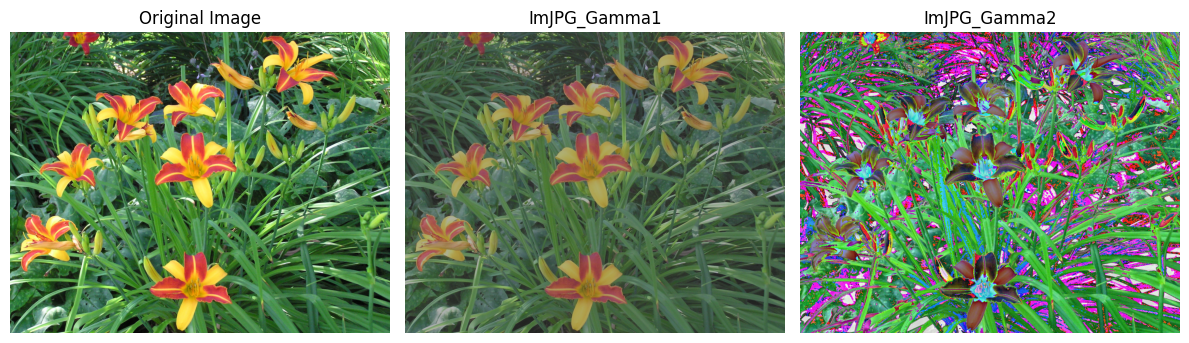

In [14]:
#Q14. Finally, try the non-linear color transformation such as Gamma-conversion

ImJPG_Gamma1 = np.uint8(np.power(ImJPG.astype(float), 0.9)) + 30
ImJPG_Gamma2 = np.uint8(np.power(ImJPG.astype(float), 1.1)) - 50
# Display the resulting images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(ImJPG)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Gamma1)
plt.title('ImJPG_Gamma1')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Gamma2)
plt.title('ImJPG_Gamma2')
plt.axis('off')
plt.tight_layout()
plt.show()